## Name of the Project : Term_Deposit_Prediction

### Business Problem :

The Banks would like to know whether the customer will opt for Term deposit or not based on the campaignss that they have done through phone calls so that they can analyze and make necessary plans to improve their business.

### Description of the dataset:

Data set has information about customers and the campaigns done by bank towards term deposit. There is column named y in the data set which tells whether or not the customer opted term deposit.

<b>File Format :</b>csv
    
<b>Rows :</b>45211
    
<b>Columns :</b>17

<b>Target Variable :</b>y

### Attribute Information :

<b>age :</b> Age of the customer

<b>job :</b> type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

<b>marital :</b> marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

<b>education :</b> (categorical: "primary","secondary","tertiary","unknown")

<b>default :</b> has credit in default? (categorical: "no","yes","unknown")

<b>balance :</b> Balance of the customer.

<b>housing :</b> has housing loan? (categorical: "no","yes","unknown")

</b>loan :</b> has personal loan? (categorical: "no","yes","unknown")

<b>contact :</b> contact communication type (categorical: "cellular","telephone")
    
<b>month :</b> last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    
<b>day_of_week  :</b> last contact day of the week (categorical: "mon","tue","wed","thu","fri")

<b>duration  :</b> last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
        
<b>campaign :</b>number of contacts performed during this campaign and for this client (numeric, includes last contact)
    
<b>pdays :</b> number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

<b>previous :</b>number of contacts performed before this campaign and for this client (numeric)
    
<b>poutcome :</b>outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
    
<b>y :</b>Whether or not the customer has term deposit

        

### Objective :

To build a model which predicts whether the customer will opt of Term depoist or not.

### Constraints :
1.Acceptable with little latency.

2.Need good Exploratory Data Analysis.

### Type of Machine Learning Problem :

Binary Classification

### Performace Metrics :

Try with as many as possible metrics.

1.Accuracy

2.Confusion Matrix

3.Precision and Recall

4.F1 score


### Train and Test Construction :
We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with.

### Let us start the model development!!

#### Importing necessary libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Reading the data from csv :

In [2]:
data=pd.read_csv("D:\Projects\Term_Deposit_Prediction/bank_customer_survey.csv")

### Exploratory Data Analysis(EDA) :

In [3]:
# Shape of the dataframe

data.shape

(45211, 17)

In [4]:
# showing the 1st 5 records of the dataframe

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


#### Checking for Number of NaN values in each column:

In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Checking the data types of the columns :

In [6]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

All columns have proper data types.Therefore,no need of type casting.

#### Checking the Target Class count of the dataset :

In [7]:
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

#### Observation :

Form the above results,we can see that the dataset is Imbalanced.If we use Accuracy as a metric,it may lead to misclassification.Therefore,we can use othe metrics.

Below are the few ways that we can solve Imbalnced dataset problem.

1.Parametric method using class_weight

2.Using tree algoithms like Decision tree,Random Forest,Bagging,Boosting algorithms.

3.Using Upsampling and downsampling,SMOTE

4.Using different metrics.

#### Checking the unique values of the columns :

In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [9]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue', 'unknown',
       'retired', 'admin', 'services', 'self', 'unemployed', 'housemaid',
       'student'], dtype=object)

In [10]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [11]:
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
data['housing'].unique()

array(['yes', 'no'], dtype=object)

In [13]:
data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [15]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [16]:
data['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [17]:
data['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [18]:
data['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [19]:
data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [20]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

### Data Visualization :

[0 1]


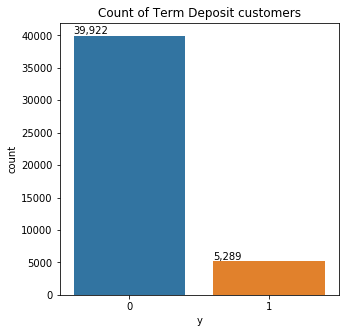

In [21]:
print(data['y'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['y'])
ax.set_title("Count of Term Deposit customers")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

['tertiary' 'secondary' 'unknown' 'primary']


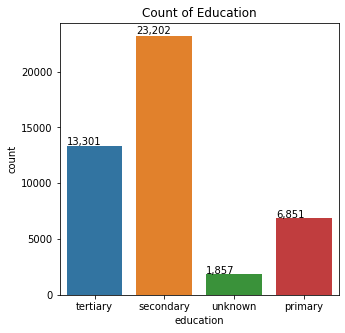

In [22]:
print(data['education'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['education'])
ax.set_title("Count of Education")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

['management' 'technician' 'entrepreneur' 'blue' 'unknown' 'retired'
 'admin' 'services' 'self' 'unemployed' 'housemaid' 'student']


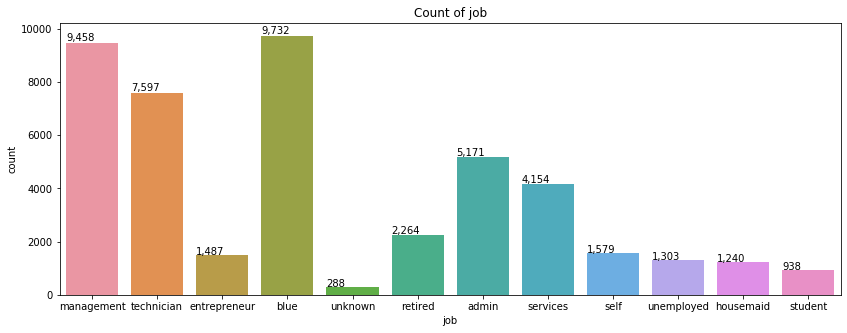

In [23]:
print(data['job'].unique())

fig = plt.figure(figsize=(14,5))
ax = sns.countplot(data['job'])
ax.set_title("Count of job")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

['married' 'single' 'divorced']


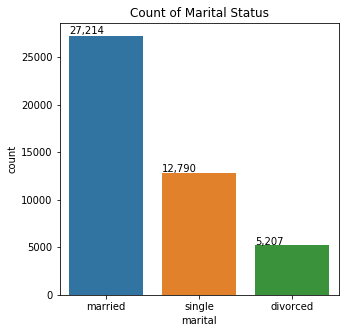

In [24]:
print(data['marital'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['marital'])
ax.set_title("Count of Marital Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

['no' 'yes']


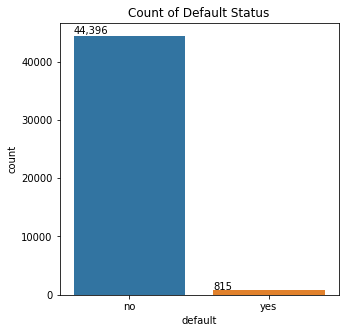

In [25]:
print(data['default'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['default'])
ax.set_title("Count of Default Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

['yes' 'no']


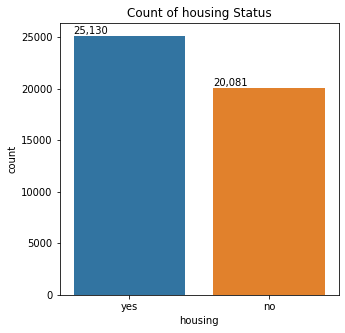

In [26]:
print(data['housing'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['housing'])
ax.set_title("Count of housing Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

['no' 'yes']


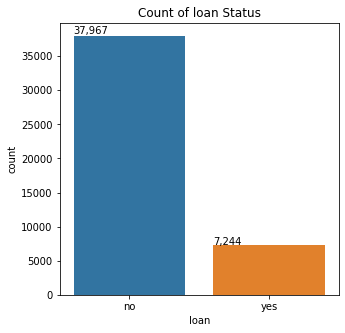

In [27]:
print(data['loan'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['loan'])
ax.set_title("Count of loan Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

['unknown' 'cellular' 'telephone']


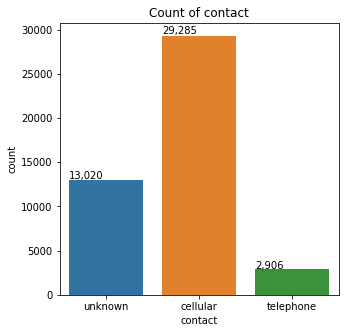

In [28]:
print(data['contact'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['contact'])
ax.set_title("Count of contact")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


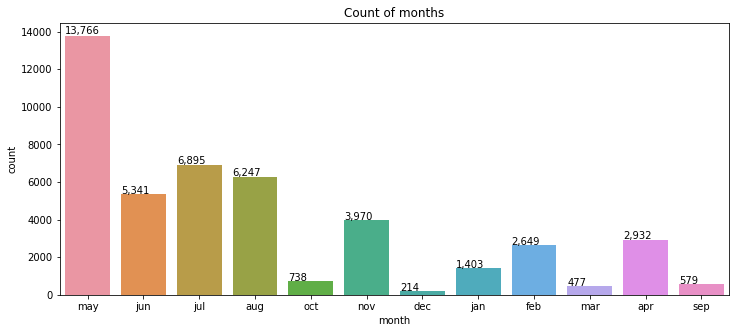

In [29]:
print(data['month'].unique())

fig = plt.figure(figsize=(12,5))
ax = sns.countplot(data['month'])
ax.set_title("Count of months")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

['unknown' 'failure' 'other' 'success']


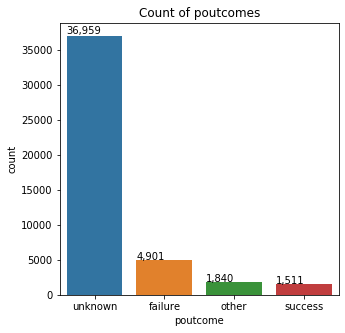

In [30]:
print(data['poutcome'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['poutcome'])
ax.set_title("Count of poutcomes")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

#### Data Visualization : countplot

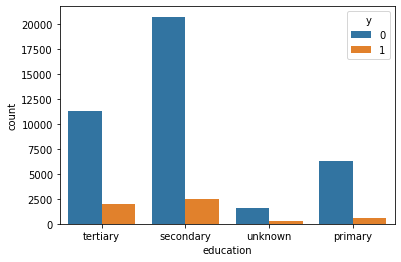

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(data['education'],hue=data['y'])
plt.show()

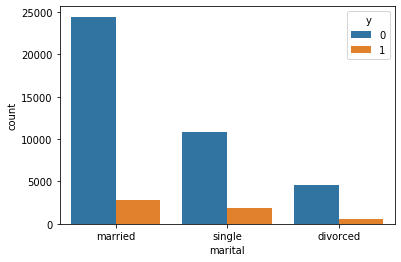

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(data['marital'],hue=data['y'])
plt.show()

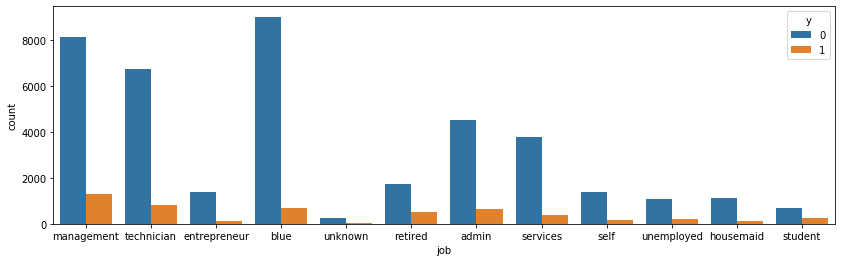

In [33]:
plt.figure(figsize=(14,4))
sns.countplot(data['job'],hue=data['y'])
plt.show()

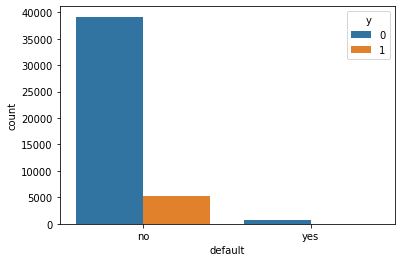

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(data['default'],hue=data['y'])
plt.show()

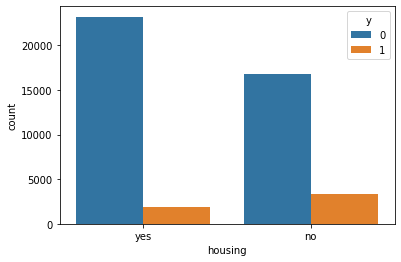

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(data['housing'],hue=data['y'])
plt.show()

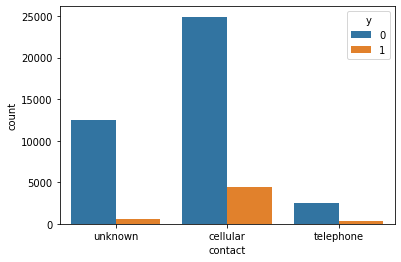

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(data['contact'],hue=data['y'])
plt.show()

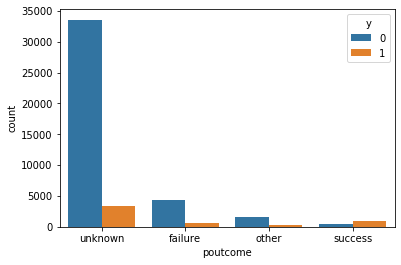

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(data['poutcome'],hue=data['y'])
plt.show()

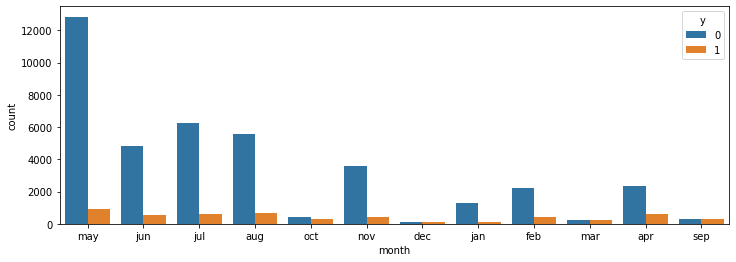

In [38]:
plt.figure(figsize=(12,4))
sns.countplot(data['month'],hue=data['y'])
plt.show()

#### Data Visualization : Boxplot

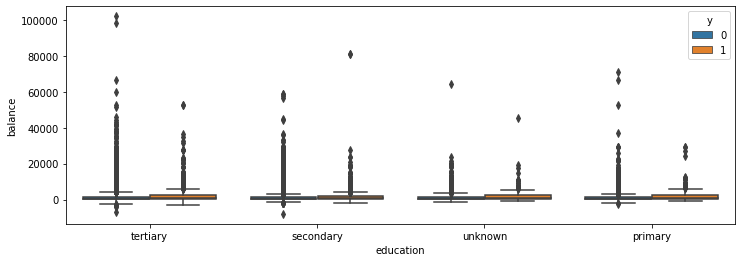

In [39]:
plt.figure(figsize=(12,4))
sns.boxplot(x='education', y='balance', data=data, hue='y')
plt.show()

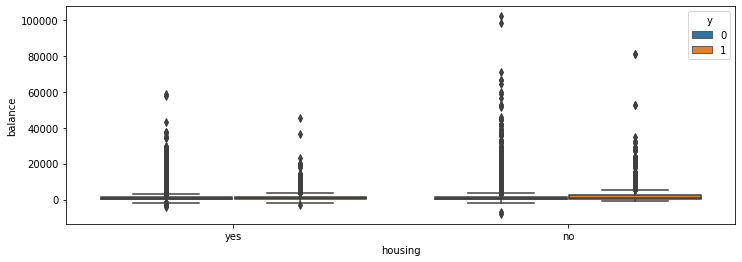

In [40]:
plt.figure(figsize=(12,4))
sns.boxplot(x='housing', y='balance', data=data, hue='y')
plt.show()

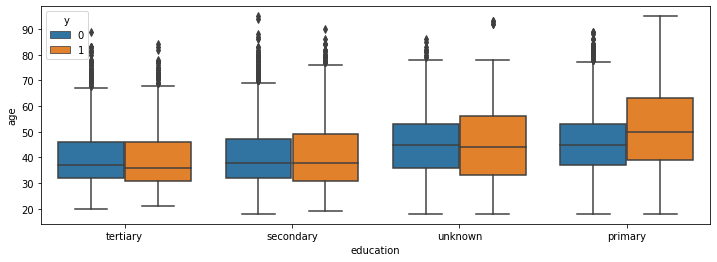

In [41]:
plt.figure(figsize=(12,4))
sns.boxplot(x='education', y='age', data=data, hue='y')
plt.show()

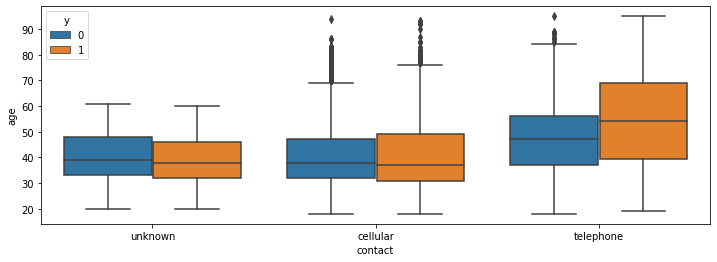

In [42]:
plt.figure(figsize=(12,4))
sns.boxplot(x='contact', y='age', data=data, hue='y')
plt.show()

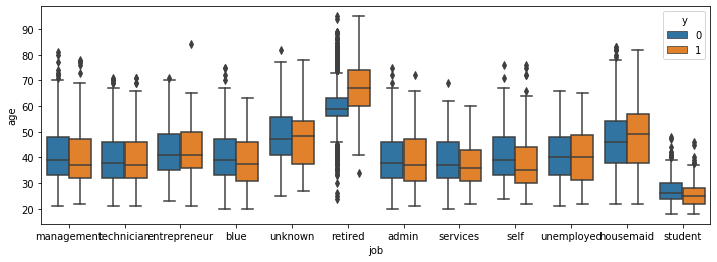

In [43]:
plt.figure(figsize=(12,4))
sns.boxplot(x='job', y='age', data=data, hue='y')
plt.show()

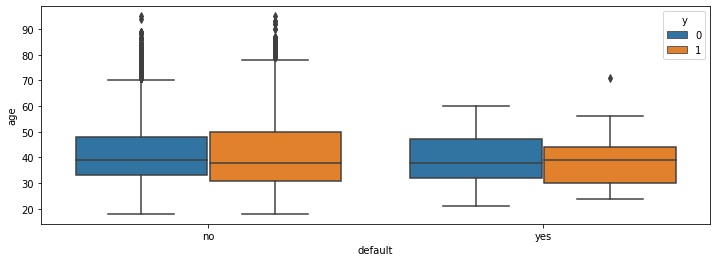

In [44]:
plt.figure(figsize=(12,4))
sns.boxplot(x='default', y='age', data=data, hue='y')
plt.show()

#### Data visualization : kedplot

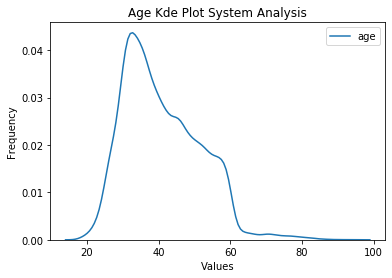

In [45]:
sns.kdeplot(data['age'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Age Kde Plot System Analysis')
plt.show()

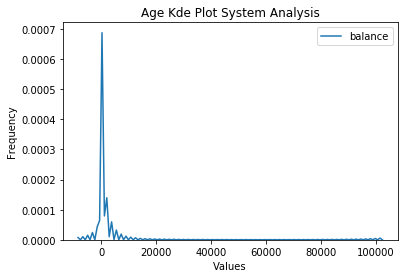

In [46]:
sns.kdeplot(data['balance'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Age Kde Plot System Analysis')
plt.show()

#### Data Visualization :violin plot

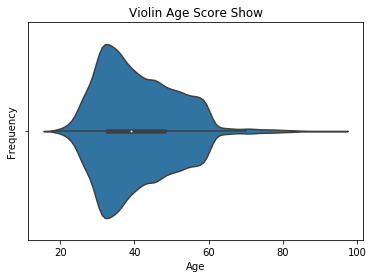

In [47]:
sns.violinplot(data['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Violin Age Score Show')
plt.show()

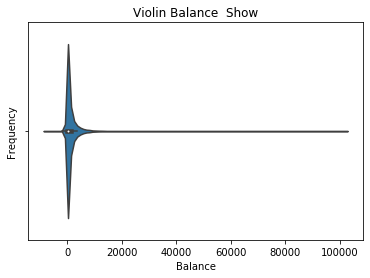

In [48]:
sns.violinplot(data['balance'])
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Violin Balance  Show')
plt.show()

### Data Prerpocessing

#### Converting Categorical variables into numerical :

In [49]:
data['marital']=data['marital'].map({'married':1,'single':2,'divorced':3})

In [50]:
# We can use any method to convert like lable encoder,one hot encoding.I have use just a map method to convert.
data['job']=data['job'].map({'management':0,'technician':1,'entrepreneur':2,'blue':3,'unknown':4,'retired':5,'admin':6,'services':7,'self':8,'unemployed':9,'housemaid':10,'student':11})

In [51]:
data['default']=data['default'].map({'no':0,'yes':1})

In [52]:
data['housing']=data['housing'].map({'no':0,'yes':1})

In [53]:
data['loan']=data['loan'].map({'no':0,'yes':1})

In [54]:
data['contact']=data['contact'].map({'unknown':0,'cellular':1,'telephone':2})

In [55]:
data['month']=data['month'].map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [56]:
data['poutcome']=data['poutcome'].map({'unknown':0,'failure':1,'other':2,'success':3})

In [57]:
data['education']=data['education'].map({'primary':0,'secondary':1,'tertiary':2,'unknown':3})

#### Dataframe after converting categorical features to numerical :

In [58]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,1,2,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,1,2,1,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,2,1,1,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,3,1,3,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,4,2,3,0,1,0,0,0,5,5,198,1,-1,0,0,0


In [59]:
data.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

#### Separating the data into Features and Labels

In [60]:
X=(data.drop(['y'],axis=1))
y=data['y']

#### Splitting the data into train,test sets

In [61]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=2)


#### Printing the shape of the train and test data

In [62]:
# Shape of the Training and Test data

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (36168, 16) (36168,)
Test set: (9043, 16) (9043,)


## Resampling Techniques :

In [63]:
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

### Oversampling Minority Class :

Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don't have a ton of data to work with. A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.

#### Important Note :
Always split into test and train sets BEFORE trying any resampling techniques! Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets! This can allow our model to simply memorize specific data points and cause overfitting.

In [64]:
from sklearn.utils import resample

In [65]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
27534,46,8,3,2,0,8017,1,1,1,21,11,169,2,-1,0,0,0
35550,39,3,1,1,0,62,1,0,1,7,5,877,3,-1,0,0,1
3773,34,7,3,1,0,169,1,0,0,16,5,260,1,-1,0,0,0
13034,32,1,3,2,0,31,0,1,1,8,7,259,1,-1,0,0,0
2889,25,1,2,2,0,777,1,0,0,14,5,351,1,-1,0,0,0


In [66]:
X.shape

(36168, 17)

In [67]:
X[X.y==0].shape

(31932, 17)

In [68]:
# separate minority and majority classes
class_majority = X[X.y==0]
class_minority = X[X.y==1]

# upsample minority
minority_upsampled = resample(class_minority,
                          replace=True, # sample with replacement
                          n_samples=len(class_majority), # match number in majority class
                          random_state=20) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([class_majority, minority_upsampled])

# check new class counts
upsampled.y.value_counts()

1    31932
0    31932
Name: y, dtype: int64

In [69]:
# Training data
X_train = upsampled.drop('y', axis=1)
y_train = upsampled['y']


## Building KNN Model 

### Hyperparameter tuning to find best k value using elbow method

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# creating odd list of K for KNN
neighbors = list(range(1,31, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

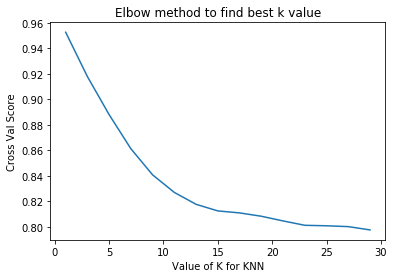

In [71]:
# Plotting the elbow method graph

plt.plot(neighbors, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Val Score')
plt.title("Elbow method to find best k value")
plt.show()

From the plot,we can see that the best k value is 13.

## Standardizing the data :

In [72]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

## Building KNN model with best k value:13

In [73]:
KNN = KNeighborsClassifier(n_neighbors=13,n_jobs=-1)
KNN.fit(X_train_std, y_train)#fitting the model
y_train_pred=KNN.predict(X_train_std)
y_test_pred=KNN.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.8936333458599524
The Test Accuracy is : 0.8084706402742453


### Plotting ROC Curvres

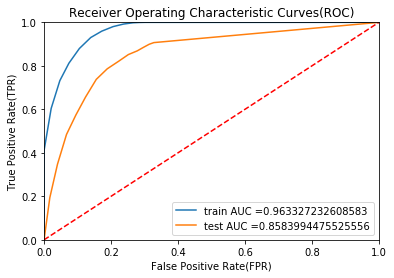

In [74]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  KNN.predict_proba(X_train_std)[:,1]
y_test_pred_proba=KNN.predict_proba(X_test_std)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

### Plotting Confusion Matrix

In [75]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

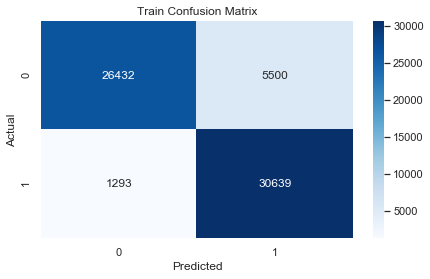

In [76]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

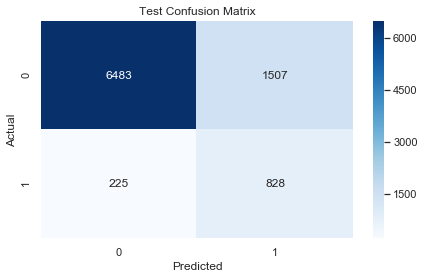

In [77]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

Since the dataset is imbalanced,we will use other metrics instead of accuracy.

### Calculating f1 score :

In [78]:
f1_score_train=f1_score(y_train,y_train_pred)
f1_score_test=f1_score(y_test,y_test_pred)
print("Training F1_score is :",f1_score_train)
print("Testing F1_score is :",f1_score_test)

Training F1_score is : 0.9002071366661281
Testing F1_score is : 0.48878394332939795


### Classification Report :

In [79]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred)
Classificationreport_test=classification_report(y_test,y_test_pred)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.95      0.83      0.89     31932
           1       0.85      0.96      0.90     31932

    accuracy                           0.89     63864
   macro avg       0.90      0.89      0.89     63864
weighted avg       0.90      0.89      0.89     63864

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.97      0.81      0.88      7990
           1       0.35      0.79      0.49      1053

    accuracy                           0.81      9043
   macro avg       0.66      0.80      0.69      9043
weighted avg       0.90      0.81      0.84      9043



### Saving KNN model for future purpose :

In [81]:
from sklearn.externals import joblib
joblib.dump(KNN,'KNN.pkl',compress=3)

['KNN.pkl']

## Building Logistic Regression 

#### Hyperparameter tuning using Randomizedseachcv :

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='l1',random_state=2,n_jobs=-1,solver='liblinear')
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
Random_cv=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,n_iter=100,scoring='accuracy',cv=10,random_state=3,n_jobs=-1)
Log_Randomecv=Random_cv.fit(X_train_std,y_train)

#### Finding best parameters :

In [83]:
Log_Randomecv.best_params_

{'C': 10}

In [84]:
Log_Randomecv.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=2,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [85]:
Log_Randomecv.best_score_

0.8070588766888742

## Building Logistic Regression with best C valued using L1 regularization

In [86]:
log=LogisticRegression(C=10,penalty='l1',random_state=3,n_jobs=-1,solver='liblinear')
#Fitting the model
log.fit(X_train_std,y_train)
y_train_pred=log.predict(X_train_std)
y_test_pred=log.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.807230990855568
The Test Accuracy is : 0.8229569833020015


### Plotting ROC Curves :

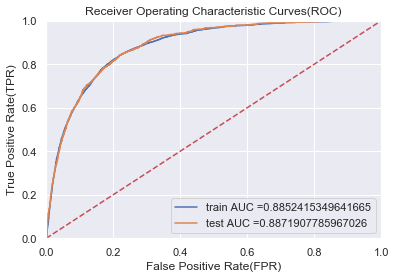

In [87]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  log.predict_proba(X_train_std)[:,1]
y_test_pred_proba=log.predict_proba(X_test_std)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

### Plotting Confusion Matrices :

In [88]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

#### Train Confusion Matrix for L1 regularization :

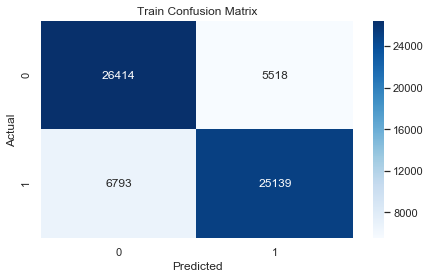

In [89]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

#### Test Confusion Matrix for L1 regularization :

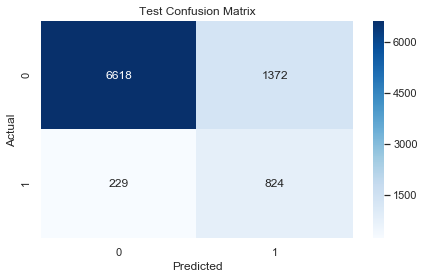

In [90]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

## Building Logistic Regression using L2 regularization

### Hyperparameter tuning using Randomizedseachcv :

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='l2',random_state=5,n_jobs=-1)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
Random_cv_l2=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,n_iter=100,scoring='accuracy',cv=10,random_state=5,n_jobs=-1)
Log_Randomecv_l2=Random_cv.fit(X_train_std,y_train)

#### Finding best parameters :

In [92]:
Log_Randomecv_l2.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=2,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Building Logistic Regression with best C valued using L2 regularization :

In [93]:
log=LogisticRegression(C=10,penalty='l2',random_state=5,n_jobs=-1)
#Fitting the model
log.fit(X_train_std,y_train)
y_train_pred_l2=log.predict(X_train_std)
y_test_pred_l2=log.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.807230990855568
The Test Accuracy is : 0.8229569833020015


### Plotting ROC Curves :

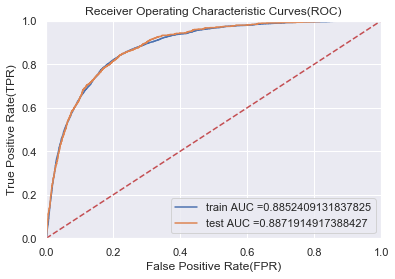

In [94]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  log.predict_proba(X_train_std)[:,1]
y_test_pred_proba=log.predict_proba(X_test_std)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

### Plotting Confusion Matrices :

In [95]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_l2)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_l2)
df_Train_l2=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test_l2=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

#### Train Confusion Matrix for L2 regularization :

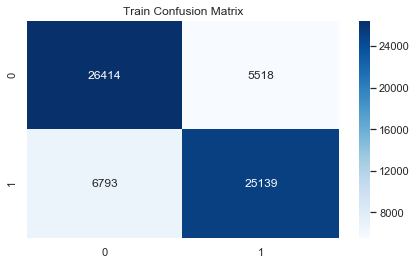

In [96]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train_l2, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

#### Test Confusion Matrix for L2 regularization :

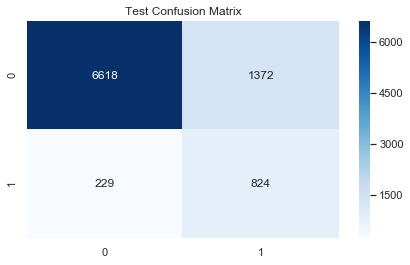

In [97]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test_l2, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

###  Classification report- L1 regularization

In [98]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred)
Classificationreport_test=classification_report(y_test,y_test_pred)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.80      0.83      0.81     31932
           1       0.82      0.79      0.80     31932

    accuracy                           0.81     63864
   macro avg       0.81      0.81      0.81     63864
weighted avg       0.81      0.81      0.81     63864

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.97      0.83      0.89      7990
           1       0.38      0.78      0.51      1053

    accuracy                           0.82      9043
   macro avg       0.67      0.81      0.70      9043
weighted avg       0.90      0.82      0.85      9043



### Classification report- L2 regularization

In [99]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred_l2)
Classificationreport_test=classification_report(y_test,y_test_pred_l2)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.80      0.83      0.81     31932
           1       0.82      0.79      0.80     31932

    accuracy                           0.81     63864
   macro avg       0.81      0.81      0.81     63864
weighted avg       0.81      0.81      0.81     63864

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.97      0.83      0.89      7990
           1       0.38      0.78      0.51      1053

    accuracy                           0.82      9043
   macro avg       0.67      0.81      0.70      9043
weighted avg       0.90      0.82      0.85      9043



### Saving Logistic Regression model for future purpose :

In [100]:
joblib.dump(log,'Logistic_Regression.pkl')

['Logistic_Regression.pkl']

## Building the model using Decision Tree 

### Hyperparameter tuning using Randomizedcv :

In [101]:
from sklearn.model_selection import RandomizedSearchCV
# Assigning values to the parameters
depth=[5, 10, 50, 100, 500]
min_samples_split=[5,10,20,30,40,50]
criterion=["gini", "entropy"]
params_grid=dict(max_depth=depth,min_samples_split=min_samples_split,criterion=criterion)

In [102]:
# Estimator

from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(random_state=4)

In [103]:
# Building RandomizedsSearchCV

DT_RandomCV=RandomizedSearchCV(DT,params_grid,cv=5,n_iter=200,scoring='accuracy',n_jobs=-1)
DT_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=4,
             

#### Finding best parameters :

In [104]:
DT_RandomCV.best_params_

{'min_samples_split': 5, 'max_depth': 50, 'criterion': 'gini'}

### Building Decision Tree model using best parameters

In [105]:
DT_clf=DecisionTreeClassifier(min_samples_split=5,max_depth=50,criterion='gini',random_state=5,class_weight='balanced')
DT_clf.fit(X_train,y_train)
y_pred_train_DT=DT_clf.predict(X_train)
y_pred_test_DT=DT_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_pred_train_DT))
print("The Test Accuracy is :",accuracy_score(y_test,y_pred_test_DT))

The Training Accuracy is : 0.9995302517850432
The Test Accuracy is : 0.8785801172177374


### Plotiing ROC Curves :

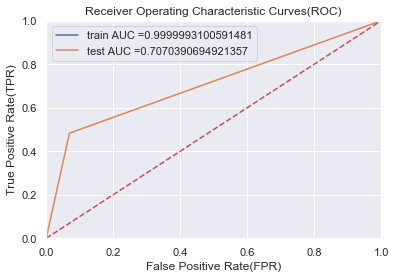

In [106]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  DT_clf.predict_proba(X_train)[:,1]
y_test_pred_proba=DT_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

### Plotting Confusion Matrices

In [107]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_pred_train_DT)
Test_Confusion_Matrix=confusion_matrix(y_test,y_pred_test_DT)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

#### Train Confusion Matrix :

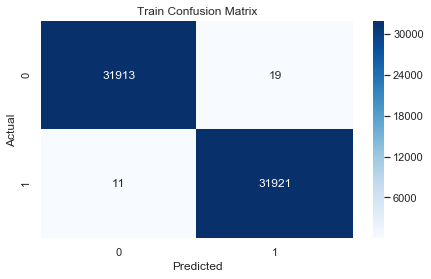

In [108]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

#### Test Confusion Matrix :

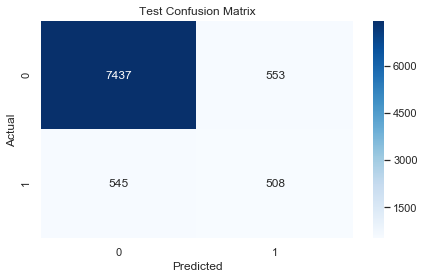

In [109]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

### Finding Classification report 

In [110]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_pred_train_DT)
Classificationreport_test=classification_report(y_test,y_pred_test_DT)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31932
           1       1.00      1.00      1.00     31932

    accuracy                           1.00     63864
   macro avg       1.00      1.00      1.00     63864
weighted avg       1.00      1.00      1.00     63864

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7990
           1       0.48      0.48      0.48      1053

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043



### Saving Decision Tree model for future purpose :

In [111]:
joblib.dump(DT_clf,'Decision_Tree.pkl')

['Decision_Tree.pkl']

## Building Random Forest model

### Hyperparameter tuning using Randomizedsearchcv

In [112]:
# Assigning values to the parameters

depth=[5, 10, 20,30]
min_samples_split=[5,10,20,30,40,50]
estimators=[50,100,150,200]
criterion=["gini", "entropy"]
params_grid=dict(n_estimators=estimators,max_depth=depth,min_samples_split=min_samples_split,criterion=criterion)
params_grid

{'n_estimators': [50, 100, 150, 200],
 'max_depth': [5, 10, 20, 30],
 'min_samples_split': [5, 10, 20, 30, 40, 50],
 'criterion': ['gini', 'entropy']}

In [113]:
# Estimator

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=2,n_jobs=-1)

In [114]:
# Building RandomizedsSearchCV

RF_RandomCV=RandomizedSearchCV(RF,params_grid,cv=5,scoring='accuracy',n_jobs=-1,n_iter=50)
RF_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

#### Finding best parameters  :

In [115]:
RF_RandomCV.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'max_depth': 30,
 'criterion': 'gini'}

## Building Random Forest model using best parameters :

In [116]:
RF_clf=RandomForestClassifier(n_estimators=150,min_samples_split=5,max_depth=30,criterion='gini',random_state=3,n_jobs=-1)
RF_clf.fit(X_train,y_train)
y_train_pred_RF=RF_clf.predict(X_train)
y_test_pred_RF=RF_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_RF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_RF))

The Training Accuracy is : 0.9999843417261681
The Test Accuracy is : 0.9045670684507354


### Plotting ROC Curves :

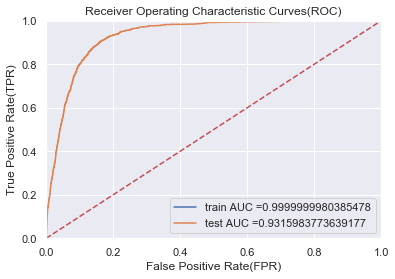

In [117]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  RF_clf.predict_proba(X_train)[:,1]
y_test_pred_proba=RF_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

### Plotting Confusion Matrices

In [118]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_RF)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_RF)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

#### Train Confusion Matrix :

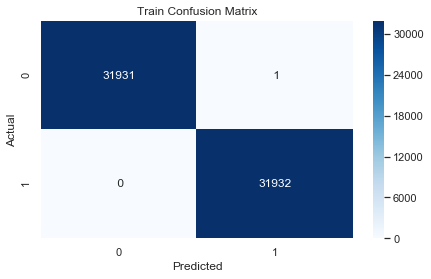

In [119]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

#### Test Confusion Matrix :

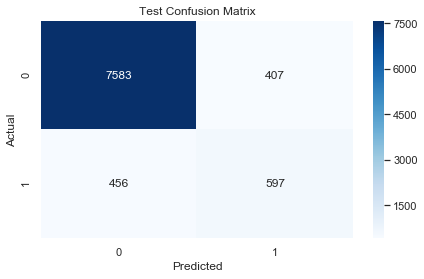

In [120]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

### Finding Classification report 

In [121]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred_RF)
Classificationreport_test=classification_report(y_test,y_test_pred_RF)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31932
           1       1.00      1.00      1.00     31932

    accuracy                           1.00     63864
   macro avg       1.00      1.00      1.00     63864
weighted avg       1.00      1.00      1.00     63864

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.94      0.95      0.95      7990
           1       0.59      0.57      0.58      1053

    accuracy                           0.90      9043
   macro avg       0.77      0.76      0.76      9043
weighted avg       0.90      0.90      0.90      9043



### Saving Random Forest model for future purpose :

In [122]:
joblib.dump(RF_clf,'Random_Forest.pkl',compress=3)

['Random_Forest.pkl']

## Handling Imbalanced data using SMOTE

In [123]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [124]:
# Separate input features and target
X = data.drop('y', axis=1)
y = data['y']


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

smote = SMOTE(random_state=4)
X_train, y_train = smote.fit_sample(X_train, y_train)

## Building Logistic Regression

#### Hyperparameter tuning :

In [125]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='l1',random_state=3,n_jobs=-1,solver='liblinear')
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
Random_cv=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,n_iter=100,scoring='accuracy',cv=5,random_state=5,n_jobs=-1)
Log_Randomecv=Random_cv.fit(X_train,y_train)

#### Finding best parameters :

In [126]:
Log_Randomecv.best_params_

{'C': 1}

#### Standardizing the data :

In [127]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

### Building Logistic Regression with best C :

In [128]:
log=LogisticRegression(C=1,penalty='l1',random_state=5,n_jobs=-1,solver='liblinear')
#Fitting the model
log.fit(X_train_std,y_train)
y_train_pred=log.predict(X_train_std)
y_test_pred=log.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.8454403008461298
The Test Accuracy is : 0.8252792214972907


### Plotting ROC Curves :

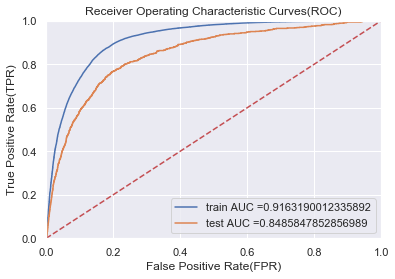

In [129]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  log.predict_proba(X_train_std)[:,1]
y_test_pred_proba=log.predict_proba(X_test_std)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

### Building Random Forest Model 

### Hyperparameter tuning :

In [130]:
# Assigning values to the parameters

depth=[5, 10, 20,30]
min_samples_split=[5,10,20,30,40,50]
estimators=[50,100,150,200]
criterion=["gini", "entropy"]
params_grid=dict(n_estimators=estimators,max_depth=depth,min_samples_split=min_samples_split,criterion=criterion)
params_grid

{'n_estimators': [50, 100, 150, 200],
 'max_depth': [5, 10, 20, 30],
 'min_samples_split': [5, 10, 20, 30, 40, 50],
 'criterion': ['gini', 'entropy']}

In [131]:
# Estimator

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=4,n_jobs=-1)

In [132]:
# Building RandomizedsSearchCV

RF_RandomCV=RandomizedSearchCV(RF,params_grid,cv=5,scoring='accuracy',n_jobs=-1,n_iter=20)
RF_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

#### Finding best parameters :

In [133]:
RF_RandomCV.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'max_depth': 30,
 'criterion': 'entropy'}

### Building Random Forest with best parameters

In [134]:
RF_clf=RandomForestClassifier(n_estimators=150,min_samples_split=5,max_depth=30,criterion='entropy',random_state=4,n_jobs=-1)
RF_clf.fit(X_train,y_train)
y_train_pred_RF=RF_clf.predict(X_train)
y_test_pred_RF=RF_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_RF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_RF))

The Training Accuracy is : 0.9955969915387026
The Test Accuracy is : 0.8791330310737587


### Plotting ROC Curves :

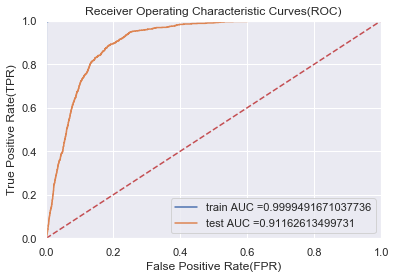

In [135]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  RF_clf.predict_proba(X_train)[:,1]
y_test_pred_proba=RF_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

### Plotting Confusion Matrix

In [136]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_RF)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_RF)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

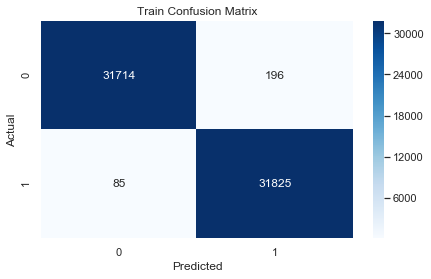

In [137]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

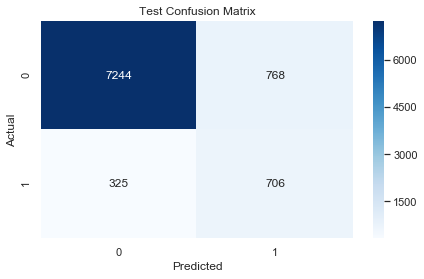

In [138]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

## Handling Imbalanced data using "class_weight" :

### Building Random Forest model 

In [139]:
# Separate input features and target
X = data.drop('y', axis=1)
y = data['y']


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

smote = SMOTE(random_state=4)
X_train, y_train = smote.fit_sample(X_train, y_train)

#### Hyperparameter tuning :

In [140]:
# Assigning values to the parameters

depth=[5, 10, 20,30]
min_samples_split=[5,10,20,30,40,50]
estimators=[50,100,150,200,300]
criterion=["gini", "entropy"]
params_grid=dict(n_estimators=estimators,max_depth=depth,min_samples_split=min_samples_split,criterion=criterion)
params_grid

{'n_estimators': [50, 100, 150, 200, 300],
 'max_depth': [5, 10, 20, 30],
 'min_samples_split': [5, 10, 20, 30, 40, 50],
 'criterion': ['gini', 'entropy']}

In [141]:
# Estimator

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=4,n_jobs=-1)

In [142]:
# Building RandomizedsSearchCV

RF_RandomCV=RandomizedSearchCV(RF,params_grid,cv=5,scoring='accuracy',n_jobs=-1,n_iter=20)
RF_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

#### Finding best parameters :

In [143]:
RF_RandomCV.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'max_depth': 20,
 'criterion': 'gini'}

### Building Random Forest with best parameters

In [144]:
RF_clf=RandomForestClassifier(n_estimators=300,min_samples_split=10,max_depth=20,criterion='gini',class_weight='balanced',random_state=5,n_jobs=-1)
RF_clf.fit(X_train,y_train)
y_train_pred_RF=RF_clf.predict(X_train)
y_test_pred_RF=RF_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_RF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_RF))

The Training Accuracy is : 0.9659824506424318
The Test Accuracy is : 0.8729403958863209


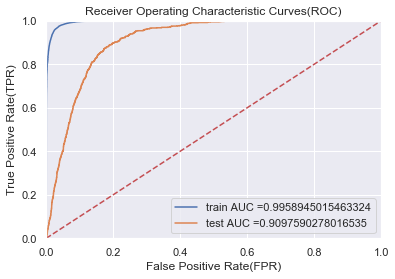

In [145]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  RF_clf.predict_proba(X_train)[:,1]
y_test_pred_proba=RF_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

### Plotting Confusion Matrix 

In [146]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_RF)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_RF)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

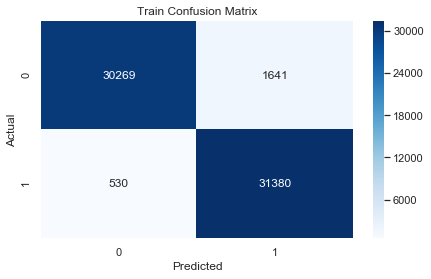

In [147]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

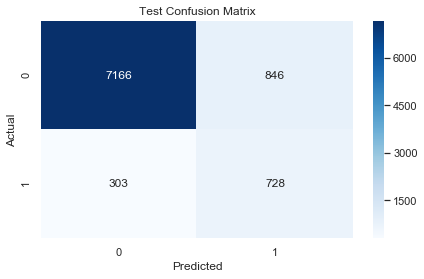

In [148]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

## Building XGBOOST Classifier

### Hyperparameter tuning 

In [149]:
from sklearn.model_selection import RandomizedSearchCV
# Assigning values to the parameters
depth=[1, 5, 10, 50, 100, 200]
estimators=[50,70,90,110,130,150,170]
params_grid=dict(max_depth=depth,n_estimators=estimators)

In [150]:
# Estimator

from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=5,n_jobs=-1)

In [151]:
# Building RandomizedsSearchCV

xgb_RandomCV=RandomizedSearchCV(xgb,params_grid,cv=3,scoring='accuracy',n_jobs=-1)
xgb_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=5, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='d

#### Finding best parameters :

In [152]:
xgb_RandomCV.best_params_

{'n_estimators': 170, 'max_depth': 50}

### Building Xgboost with best parameters :

In [153]:
XGB=XGBClassifier(n_estimators=170,max_depth=50,random_state=6,n_jobs=-1)
XGB.fit(X_train,y_train)
y_train_pred_XGBF=XGB.predict(X_train)
y_test_pred_XGB=XGB.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_XGBF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_XGB))

The Training Accuracy is : 1.0
The Test Accuracy is : 0.885989162888422


We can see that the model is overfitted.We can make it bit complex to avoid overfitting.

In [154]:
XGB=XGBClassifier(n_estimators=170,max_depth=50,random_state=6,n_jobs=-1,gamma=0.8,subsample=0.9)
XGB.fit(X_train,y_train)
y_train_pred_XGBF=XGB.predict(X_train)
y_test_pred_XGB=XGB.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_XGBF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_XGB))

The Training Accuracy is : 0.9999216546537135
The Test Accuracy is : 0.8865420767444432


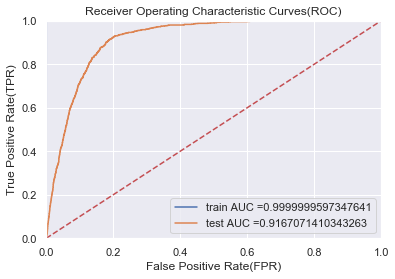

In [155]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  XGB.predict_proba(X_train)[:,1]
y_test_pred_proba=XGB.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

### Confusion Matrix

In [156]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_XGBF)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_XGB)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

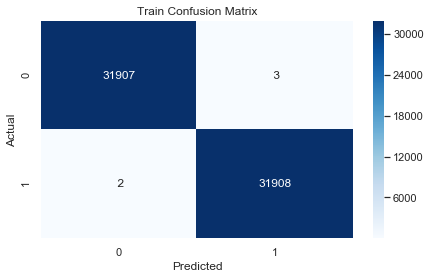

In [157]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

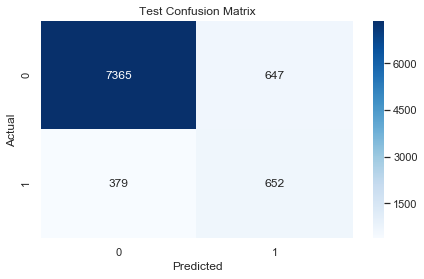

In [158]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

### Classification Report :

In [159]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred_XGBF)
Classificationreport_test=classification_report(y_test,y_test_pred_XGB)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31910
           1       1.00      1.00      1.00     31910

    accuracy                           1.00     63820
   macro avg       1.00      1.00      1.00     63820
weighted avg       1.00      1.00      1.00     63820

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.95      0.92      0.93      8012
           1       0.50      0.63      0.56      1031

    accuracy                           0.89      9043
   macro avg       0.73      0.78      0.75      9043
weighted avg       0.90      0.89      0.89      9043



## Comparing the performance of models using Pretty Table

In [160]:
from prettytable import PrettyTable
x=PrettyTable()

In [161]:
x.field_names=['Model_Name','Train_AUC','Test_AUC','Traing_Acc','Test_Acc']

In [162]:
x.add_row(['KNN',96.33,85.83,89.36,80.84])
x.add_row(['Logistic_Regression',88.52,88.71,80.72,82.29])
x.add_row(['Decision Tree',99.99,70.70,99.95,87.85])
x.add_row(['Random_Forest',99.99,92.95,99.35,90.00])
x.add_row(['Xgboost',99.99,91.69,99.98,88.68])

In [163]:
print(x)

+---------------------+-----------+----------+------------+----------+
|      Model_Name     | Train_AUC | Test_AUC | Traing_Acc | Test_Acc |
+---------------------+-----------+----------+------------+----------+
|         KNN         |   96.33   |  85.83   |   89.36    |  80.84   |
| Logistic_Regression |   88.52   |  88.71   |   80.72    |  82.29   |
|    Decision Tree    |   99.99   |   70.7   |   99.95    |  87.85   |
|    Random_Forest    |   99.99   |  92.95   |   99.35    |   90.0   |
|       Xgboost       |   99.99   |  91.69   |   99.98    |  88.68   |
+---------------------+-----------+----------+------------+----------+


## Conclusions :

From the Pretty table,we can see that the <b>Random Forest</b> is the best model.Therefore,we can deploy Random Forest model in production.